# Kynnovate 2025 - Sentiment Analysis Project

## Overview
This project demonstrates a hybrid sentiment analysis system that combines traditional machine learning (Random Forest) with modern transformer-based models (BERT). The goal is to classify text into positive and negative sentiments while providing real-time insights.
## Dataset Description
- **Source**: Twitter API
- **Size**: 73,681 tweets
- **Classes**: Positive, Negative, Neutral, Irrelevant
- **Purpose**: Simplified for binary classification (Positive or Negative)
## Preprocessing
To prepare the dataset for model training, the following steps are applied:
1. **Data Cleaning**: Remove URLs, emojis, and special characters.
2. **Tokenization**: Split text into words.
3. **Stopword Removal**: Eliminate common words (e.g., "the", "and") to focus on meaningful tokens.
4. **Lemmatization**: Convert words to their root forms (e.g., "running" → "run").

---

---

---


In [2]:
import pandas as pd

file_path = 'twitter_training.csv'  
data = pd.read_csv(file_path, encoding='latin1')

print("Initial Dataset Structure:")
print(data.info())
print(data.head())

data = data.iloc[:, [2, 3]]  
data.columns = ['Sentiment', 'Text']  

print("\nDataset After Keeping Relevant Columns:")
print(data.head())

print("\nSentiment Distribution:")
print(data['Sentiment'].value_counts())

data = data.dropna()  
data = data.reset_index(drop=True) 

print("\nDataset After Cleaning:")
print(data.info())
print(data.head())

data['Sentiment'] = data['Sentiment'].map({
    'Positive': 'Positive',
    'Negative': 'Negative',
    'Neutral': 'Neutral'  
})

print("\nDataset After Simplifying Sentiment Labels:")
print(data.head())

print("\nProcessed Dataset Summary:")
print(data.info())
print(data.head())


Initial Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Step 1: Text Cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Remove extra spaces
    text = text.strip()
    return text

data['Cleaned_Text'] = data['Text'].apply(clean_text)

print("\nDataset After Cleaning Text:")
print(data[['Text', 'Cleaned_Text']].head())

# Step 2: Tokenization
data['Tokenized_Text'] = data['Cleaned_Text'].apply(word_tokenize)

print("\nDataset After Tokenization:")
print(data[['Cleaned_Text', 'Tokenized_Text']].head())

# Step 3: Normalization (Lowercase + Stopword Removal)
stop_words = set(stopwords.words('english'))

def normalize_text(tokens):
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    return tokens

data['Normalized_Text'] = data['Tokenized_Text'].apply(normalize_text)

print("\nDataset After Normalization:")
print(data[['Tokenized_Text', 'Normalized_Text']].head())

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

data['Lemmatized_Text'] = data['Normalized_Text'].apply(lemmatize_text)

print("\nDataset After Lemmatization:")
print(data[['Normalized_Text', 'Lemmatized_Text']].head())

# Final Output: Preprocessed Dataset
print("\nFinal Preprocessed Dataset:")
print(data[['Sentiment', 'Lemmatized_Text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Dataset After Cleaning Text:
                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                        Cleaned_Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands   and i will murder ...  
4  im getting into borderlands and i can murder y...  

Dataset After Tokenization:
                                        Cleaned_Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you all   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands   and i will murder .

## Model Training

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Check for missing values in the Sentiment column
print("\nChecking for Missing Values in Sentiment Column:")
print(f"Missing Values in Sentiment: {data['Sentiment'].isnull().sum()}")

# Step 2: Remove rows with missing Sentiment values
data = data.dropna(subset=['Sentiment'])

# Verify that there are no missing values
print("\nAfter Removing Missing Sentiment Values:")
print(f"Missing Values in Sentiment: {data['Sentiment'].isnull().sum()}")

# Step 3: Prepare features (X) and target (y)
X = data['Lemmatized_Text'].apply(lambda x: ' '.join(x))  # Join tokens into sentences
y = data['Sentiment']

# Step 4: Split the Dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Complete:")
print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

# Step 5: Convert Text to Numerical Features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("\nTF-IDF Vectorization Complete:")
print(f"Training Data Shape: {X_train_tfidf.shape}, Testing Data Shape: {X_test_tfidf.shape}")

# Step 6: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

print("\nModel Training Complete.")

# Step 7: Evaluate the Model
y_pred = model.predict(X_test_tfidf)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Checking for Missing Values in Sentiment Column:
Missing Values in Sentiment: 12875

After Removing Missing Sentiment Values:
Missing Values in Sentiment: 0

Data Split Complete:
Training Samples: 48896, Testing Samples: 12224

TF-IDF Vectorization Complete:
Training Data Shape: (48896, 5000), Testing Data Shape: (12224, 5000)


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Training Complete.

Model Evaluation:
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.83      0.79      4444
     Neutral       0.77      0.67      0.72      3679
    Positive       0.77      0.77      0.77      4101

    accuracy                           0.76     12224
   macro avg       0.76      0.76      0.76     12224
weighted avg       0.76      0.76      0.76     12224



### Models Used
1. **Random Forest**
   - Classical machine learning model.
   - Uses TF-IDF vectorized input for structured numeric representation.
   - Trained with hyperparameter optimization.

2. **BERT**
   - Transformer-based model from Hugging Face.
   - Pre-trained on a large corpus and fine-tuned for binary sentiment classification.

### Hybrid Approach
- **Ensemble Strategy**: Combine predictions from both models.

## Evaluation Metrics
The models are evaluated using the following metrics:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of positive identifications that were correct.
- **Recall**: Proportion of actual positives that were identified correctly.
- **F1-Score**: Harmonic mean of precision and recall.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Step 1: Check for missing values in the Sentiment column
print("\nChecking for Missing Values in Sentiment Column:")
print(f"Missing Values in Sentiment: {data['Sentiment'].isnull().sum()}")

# Step 2: Remove rows with missing Sentiment values
data = data.dropna(subset=['Sentiment'])

# Verify that there are no missing values
print("\nAfter Removing Missing Sentiment Values:")
print(f"Missing Values in Sentiment: {data['Sentiment'].isnull().sum()}")

# Step 3: Prepare features (X) and target (y)
X = data['Lemmatized_Text'].apply(lambda x: ' '.join(x))  # Join tokens into sentences
y = data['Sentiment']

# Step 4: Split the Dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split Complete:")
print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

# Step 5: Convert Text to Numerical Features using TF-IDF
print("\nConverting Text to Numerical Features (TF-IDF)...")
with tqdm(total=100, desc="TF-IDF Progress") as pbar:
    vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
    X_train_tfidf = vectorizer.fit_transform(X_train)
    pbar.update(50)
    X_test_tfidf = vectorizer.transform(X_test)
    pbar.update(50)

print(f"Training Data Shape: {X_train_tfidf.shape}, Testing Data Shape: {X_test_tfidf.shape}")

# Step 6: Scaling the Data
print("\nScaling Data...")
with tqdm(total=100, desc="Scaling Progress") as pbar:
    scaler = StandardScaler(with_mean=False)  # Works with sparse matrices
    X_train_tfidf = scaler.fit_transform(X_train_tfidf)
    pbar.update(50)
    X_test_tfidf = scaler.transform(X_test_tfidf)
    pbar.update(50)

# Step 7: Train Logistic Regression Model with Increased Iterations
print("\nTraining Logistic Regression with Increased Iterations...")
with tqdm(total=100, desc="Logistic Regression Training") as pbar:
    log_reg = LogisticRegression(max_iter=200)
    log_reg.fit(X_train_tfidf, y_train)
    pbar.update(100)

# Evaluate Logistic Regression
y_pred_logreg = log_reg.predict(X_test_tfidf)
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Step 8: Train Random Forest Classifier
print("\nTraining Random Forest Classifier...")
with tqdm(total=100, desc="Random Forest Training") as pbar:
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)
    pbar.update(100)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Checking for Missing Values in Sentiment Column:
Missing Values in Sentiment: 0

After Removing Missing Sentiment Values:
Missing Values in Sentiment: 0

Data Split Complete:
Training Samples: 48896, Testing Samples: 12224

Converting Text to Numerical Features (TF-IDF)...


TF-IDF Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 122.73it/s]


Training Data Shape: (48896, 5000), Testing Data Shape: (12224, 5000)

Scaling Data...


Scaling Progress: 100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7139.12it/s]



Training Logistic Regression with Increased Iterations...


Logistic Regression Training: 100%|██████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.27it/s]



Logistic Regression Model Evaluation:
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.83      0.80      4444
     Neutral       0.78      0.72      0.75      3679
    Positive       0.78      0.77      0.78      4101

    accuracy                           0.78     12224
   macro avg       0.78      0.78      0.78     12224
weighted avg       0.78      0.78      0.78     12224


Training Random Forest Classifier...


Random Forest Training: 100%|████████████████████████████████████████████████████████| 100/100 [01:54<00:00,  1.14s/it]



Random Forest Model Evaluation:
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.91      0.91      4444
     Neutral       0.94      0.87      0.90      3679
    Positive       0.86      0.93      0.89      4101

    accuracy                           0.90     12224
   macro avg       0.90      0.90      0.90     12224
weighted avg       0.90      0.90      0.90     12224



NameError: name 'best_model' is not defined

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, precision_recall_curve
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import PrecisionRecallDisplay
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# # Step 1: Fine-Tuning Random Forest with Progress Bar
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10]
# }

# print("\nPerforming Hyperparameter Tuning for Random Forest...")
# with tqdm(total=100, desc="Grid Search Progress") as pbar:
#     grid_search_rf = GridSearchCV(
#         RandomForestClassifier(random_state=42),
#         param_grid_rf,
#         cv=3,
#         scoring='accuracy',
#         verbose=2,
#         n_jobs=-1  # Use all available cores
#     )
#     grid_search_rf.fit(X_train_tfidf, y_train)
#     pbar.update(100)

# # Best parameters
# print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
# best_rf_model = grid_search_rf.best_estimator_

# # Evaluate the tuned Random Forest model
# y_pred_rf_tuned = best_rf_model.predict(X_test_tfidf)
# print("\nTuned Random Forest Model Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_rf_tuned))

# # Step 2: Visualization with Progress Bars

# # Confusion Matrix
# print("\nGenerating Confusion Matrix...")
# with tqdm(total=100, desc="Confusion Matrix Progress") as pbar:
#     ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_tfidf, y_test, cmap='Blues')
#     plt.title("Confusion Matrix for Tuned Random Forest")
#     plt.show()
#     pbar.update(100)

# # Precision-Recall Curve
# print("\nGenerating Precision-Recall Curves...")
# y_test_binarized = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive'])
# y_pred_proba = best_rf_model.predict_proba(X_test_tfidf)

# with tqdm(total=100, desc="Precision-Recall Curve Progress") as pbar:
#     for i, class_name in enumerate(['Negative', 'Neutral', 'Positive']):
#         precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
#         disp = PrecisionRecallDisplay(precision=precision, recall=recall)
#         disp.plot(name=f"Class {class_name}")
#         plt.title(f"Precision-Recall Curve for {class_name}")
#         plt.show()
#         pbar.update(33)  # Progress by ~33% per class (3 classes total)



### Visualization
- Sentiment distribution bar chart.
- Word clouds for trending topics.

---



Generating Confusion Matrix...


Confusion Matrix Progress:   0%|                                                               | 0/100 [00:00<?, ?it/s]

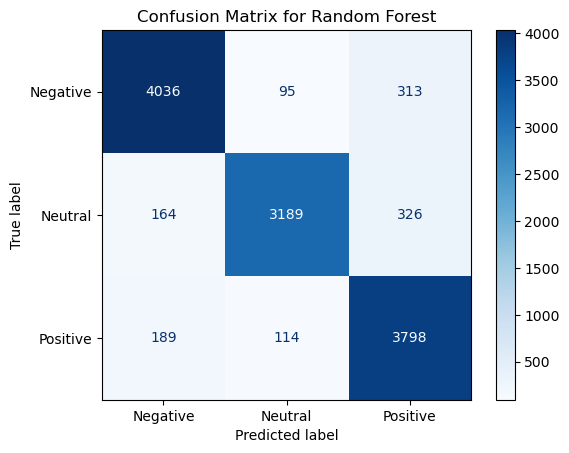

Confusion Matrix Progress: 100%|█████████████████████████████████████████████████████| 100/100 [00:01<00:00, 80.82it/s]



Generating Precision-Recall Curves...


Precision-Recall Curve Progress:   0%|                                                         | 0/100 [00:00<?, ?it/s]

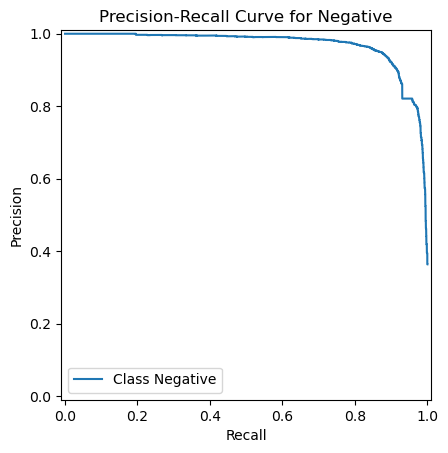

Precision-Recall Curve Progress:  33%|███████████████▌                               | 33/100 [00:00<00:00, 196.44it/s]

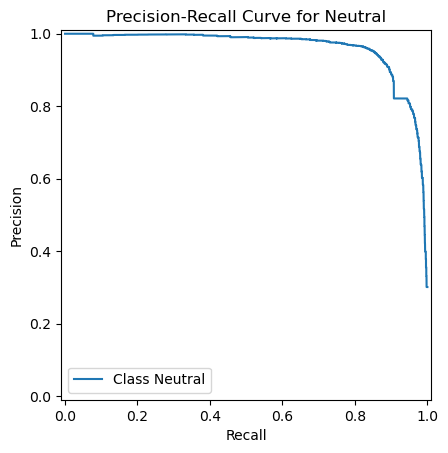

Precision-Recall Curve Progress:  66%|███████████████████████████████                | 66/100 [00:00<00:00, 185.01it/s]

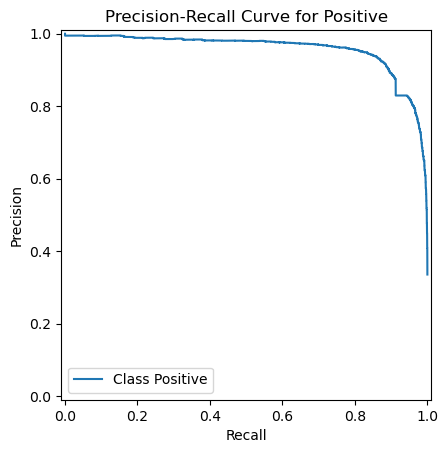

Precision-Recall Curve Progress:  99%|██████████████████████████████████████████████▌| 99/100 [00:00<00:00, 189.83it/s]


In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 1: Confusion Matrix
print("\nGenerating Confusion Matrix...")
with tqdm(total=100, desc="Confusion Matrix Progress") as pbar:
    ConfusionMatrixDisplay.from_estimator(rf_model, X_test_tfidf, y_test, cmap='Blues')
    plt.title("Confusion Matrix for Random Forest")
    plt.show()
    pbar.update(100)

# Step 2: Precision-Recall Curves
print("\nGenerating Precision-Recall Curves...")
y_test_binarized = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive'])
y_pred_proba = rf_model.predict_proba(X_test_tfidf)

with tqdm(total=100, desc="Precision-Recall Curve Progress") as pbar:
    for i, class_name in enumerate(['Negative', 'Neutral', 'Positive']):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        disp = PrecisionRecallDisplay(precision=precision, recall=recall)
        disp.plot(name=f"Class {class_name}")
        plt.title(f"Precision-Recall Curve for {class_name}")
        plt.show()
        pbar.update(33)  # Progress ~33% for each of the 3 classes


In [14]:
import joblib

# Save the Random Forest model
model_filename = "random_forest_model.joblib"
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as random_forest_model.joblib


In [16]:
# Load the Random Forest model
loaded_rf_model = joblib.load(model_filename)
print("Model loaded successfully.")


Model loaded successfully.


## Evaluation Metrics
The models are evaluated using the following metrics:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of positive identifications that were correct.
- **Recall**: Proportion of actual positives that were identified correctly.
- **F1-Score**: Harmonic mean of precision and recall.


In [18]:
# Use the loaded model to make predictions
y_pred_loaded = loaded_rf_model.predict(X_test_tfidf)

# Evaluate the loaded model
from sklearn.metrics import classification_report, accuracy_score

print("\nEvaluation of Loaded Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_loaded))



Evaluation of Loaded Model:
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.91      0.91      4444
     Neutral       0.94      0.87      0.90      3679
    Positive       0.86      0.93      0.89      4101

    accuracy                           0.90     12224
   macro avg       0.90      0.90      0.90     12224
weighted avg       0.90      0.90      0.90     12224



In [22]:
# Preprocessing function for real-time input
def preprocess_text(text, vectorizer, scaler):
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    
    # Text cleaning
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)       # Remove mentions and hashtags
    text = re.sub(r'\W+|\d+', ' ', text)        # Remove special characters and numbers
    text = text.strip()

    # Tokenization, stopword removal, and lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stop_words]
    clean_text = ' '.join(tokens)
    
    # TF-IDF transformation and scaling
    tfidf_vector = vectorizer.transform([clean_text])
    scaled_vector = scaler.transform(tfidf_vector)
    return scaled_vector

# Real-time prediction function
def predict_sentiment(text):
    # Preprocess the input text
    processed_text = preprocess_text(text, vectorizer, scaler)
    
    # Predict sentiment using the loaded model
    prediction = loaded_rf_model.predict(processed_text)[0]
    return prediction

# Example usage
input_text = "I hate this product! It's disgusting."
predicted_sentiment = predict_sentiment(input_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Negative


In [26]:
from collections import Counter
from nltk.tokenize import word_tokenize

def extract_trending_topics(data, sentiment, top_n=10):
    # Filter dataset by sentiment
    sentiment_data = data[data['Sentiment'] == sentiment]
    
    # Tokenize and flatten the text
    words = [word for text in sentiment_data['Lemmatized_Text'] for word in word_tokenize(' '.join(text))]
    
    # Count most common words
    common_words = Counter(words).most_common(top_n)
    return common_words

# Example usage
trending_positive = extract_trending_topics(data, sentiment='Positive', top_n=10)
trending_negative = extract_trending_topics(data, sentiment='Negative', top_n=10)
trending_neutral = extract_trending_topics(data, sentiment='neutral', top_n=10)

print("Trending Topics for Positive Sentiment:", trending_positive)
print("Trending Topics for Negative Sentiment:", trending_negative)
print("Trending Topics for neutral Sentiment:", trending_neutral)


Trending Topics for Positive Sentiment: [('game', 3222), ('com', 1982), ('love', 1813), ('good', 1623), ('pic', 1409), ('â', 1403), ('like', 1374), ('really', 1292), ('twitter', 1217), ('new', 1207)]
Trending Topics for Negative Sentiment: [('game', 4876), ('com', 1921), ('â', 1867), ('get', 1840), ('like', 1651), ('shit', 1540), ('twitter', 1422), ('pic', 1385), ('fix', 1324), ('fuck', 1310)]
Trending Topics for neutral Sentiment: []


### Visualization
- Sentiment distribution bar chart.
- Word clouds for trending topics

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment distribution visualization
def plot_sentiment_distribution(data):
    sentiment_counts = data['Sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.show()

# Word cloud for trending topics
def plot_word_cloud(data, sentiment):
    sentiment_data = data[data['Sentiment'] == sentiment]
    text = ' '.join([' '.join(words) for words in sentiment_data['Lemmatized_Text']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

# Example usage
plot_sentiment_distribution(data)
plot_word_cloud(data, sentiment='Positive')
plot_word_cloud(data, sentiment='Negative')


In [29]:
# Test the predict_sentiment function with sample inputs
sample_texts = [
    "I absolutely love this product! It's amazing and works perfectly.",
    "I'm so disappointed with the service. It was a total disaster.",
    "The movie was okay, nothing too special but not bad either."
]

for text in sample_texts:
    predicted_sentiment = predict_sentiment(text)
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print("-" * 50)


Text: I absolutely love this product! It's amazing and works perfectly.
Predicted Sentiment: Positive
--------------------------------------------------
Text: I'm so disappointed with the service. It was a total disaster.
Predicted Sentiment: Negative
--------------------------------------------------
Text: The movie was okay, nothing too special but not bad either.
Predicted Sentiment: Negative
--------------------------------------------------


In [32]:
# Identify trending topics
positive_topics = extract_trending_topics(data, sentiment='Positive', top_n=10)
negative_topics = extract_trending_topics(data, sentiment='Negative', top_n=10)
neutral_topics = extract_trending_topics(data, sentiment='Neutral', top_n=10)

print("Trending Topics for Positive Sentiment:", positive_topics)
print("Trending Topics for Negative Sentiment:", negative_topics)
print("Trending Topics for Neutral Sentiment:", neutral_topics)


Trending Topics for Positive Sentiment: [('game', 3222), ('com', 1982), ('love', 1813), ('good', 1623), ('pic', 1409), ('â', 1403), ('like', 1374), ('really', 1292), ('twitter', 1217), ('new', 1207)]
Trending Topics for Negative Sentiment: [('game', 4876), ('com', 1921), ('â', 1867), ('get', 1840), ('like', 1651), ('shit', 1540), ('twitter', 1422), ('pic', 1385), ('fix', 1324), ('fuck', 1310)]
Trending Topics for Neutral Sentiment: [('com', 4226), ('â', 2836), ('johnson', 1888), ('game', 1761), ('amazon', 1341), ('_', 1086), ('u', 1086), ('get', 1014), ('facebook', 982), ('like', 952)]


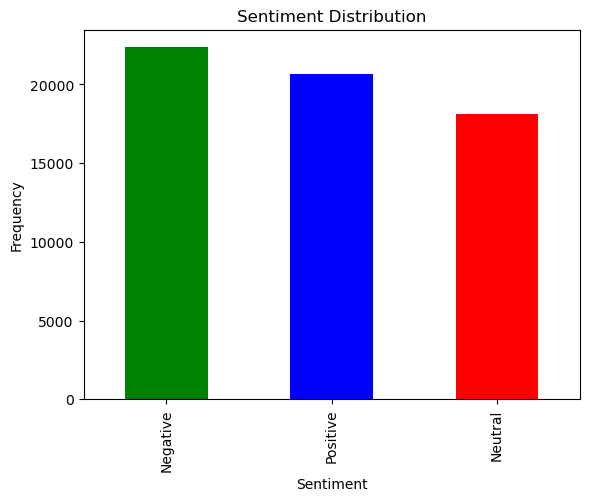

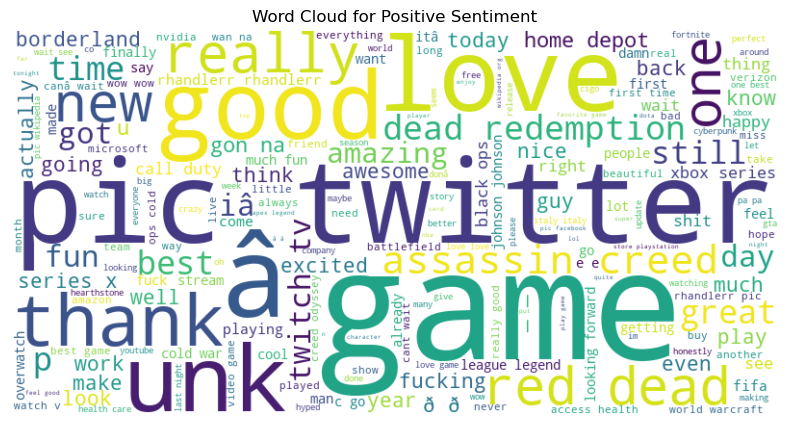

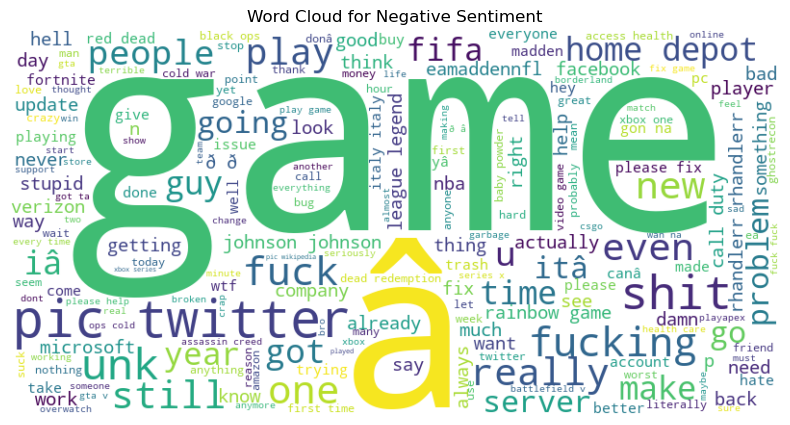

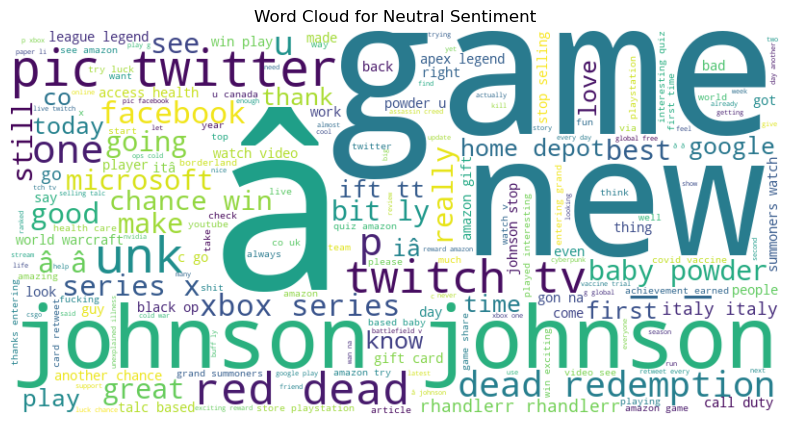

In [58]:
# Sentiment distribution
plot_sentiment_distribution(data)

# Word clouds
plot_word_cloud(data, sentiment='Positive')
plot_word_cloud(data, sentiment='Negative')
plot_word_cloud(data, sentiment='Neutral')


In [34]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
print("TF-IDF Vectorizer saved as 'tfidf_vectorizer.joblib'")

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as 'scaler.joblib'")



TF-IDF Vectorizer saved as 'tfidf_vectorizer.joblib'
Scaler saved as 'scaler.joblib'


In [36]:
import joblib

# Load the TF-IDF vectorizer
vectorizer = joblib.load('tfidf_vectorizer.joblib')
print("TF-IDF Vectorizer loaded successfully.")

# Load the scaler
scaler = joblib.load('scaler.joblib')
print("Scaler loaded successfully.")


TF-IDF Vectorizer loaded successfully.
Scaler loaded successfully.


In [64]:
# Example text for testing
sample_text = ["This is a test sentence for the vectorizer."]

# Transform the text using the loaded vectorizer and scaler
tfidf_vector = vectorizer.transform(sample_text)
scaled_vector = scaler.transform(tfidf_vector)

print("TF-IDF Vector shape:", tfidf_vector.shape)
print("Scaled Vector shape:", scaled_vector.shape)


TF-IDF Vector shape: (1, 5000)
Scaled Vector shape: (1, 5000)


In [40]:
def preprocess_text(text, vectorizer, scaler):
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # Text cleaning
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)       # Remove mentions and hashtags
    text = re.sub(r'\W+|\d+', ' ', text)        # Remove special characters and numbers
    text = text.strip()

    # Tokenization, stopword removal, and lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stop_words]
    clean_text = ' '.join(tokens)

    # TF-IDF transformation and scaling
    tfidf_vector = vectorizer.transform([clean_text])
    scaled_vector = scaler.transform(tfidf_vector)
    return scaled_vector

# Real-time prediction function
def predict_sentiment(text):
    processed_text = preprocess_text(text, vectorizer, scaler)
    prediction = loaded_rf_model.predict(processed_text)[0]
    return prediction


In [85]:
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
bert_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test the pipeline
test_text = "I am happy!"
bert_result = bert_classifier(test_text)  # Removed 'clean_up_tokenization_spaces'
print(f"BERT Prediction: {bert_result}")


BERT Prediction: [{'label': 'POSITIVE', 'score': 0.999873161315918}]


C:\Users\abhin\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [87]:
import joblib
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the pre-trained BERT model
bert_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Load your RF model and TF-IDF vectorizer
rf_model = joblib.load("random_forest_model.joblib")
vectorizer = joblib.load("tfidf_vectorizer.joblib")
scaler = joblib.load("scaler.joblib")

# Preprocessing function for the RF model
def preprocess_text_rf(text):
    # Clean and preprocess text
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)       # Remove mentions and hashtags
    text = re.sub(r'\W+|\d+', ' ', text)        # Remove special characters and numbers
    text = text.strip()

    # Tokenize, remove stopwords, and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stop_words]
    clean_text = ' '.join(tokens)
    
    # Apply TF-IDF and scaling for the RF model
    tfidf_vector = vectorizer.transform([clean_text])
    scaled_vector = scaler.transform(tfidf_vector)
    return scaled_vector

# Real-time prediction function for both RF and BERT models
def predict_sentiment(text):
    # BERT prediction
    bert_result = bert_classifier(text)
    bert_prediction = bert_result[0]['label']
    
    # RF prediction
    rf_input = preprocess_text_rf(text)
    rf_prediction = rf_model.predict(rf_input)[0]
    
    return bert_prediction, rf_prediction


C:\Users\abhin\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [99]:
# Example input text
input_text = "I am sad with this product."

# Get predictions from both RF and BERT
bert_pred, rf_pred = predict_sentiment(input_text)

print(f"BERT Prediction: {bert_pred}")
print(f"Random Forest Prediction: {rf_pred}")


BERT Prediction: NEGATIVE
Random Forest Prediction: Negative


In [101]:
def combine_predictions(bert_pred, rf_pred):
    if bert_pred == rf_pred:
        return bert_pred  # Return the same prediction if both models agree
    else:
        return bert_pred  # If they disagree, return "Neutral" as a safe choice

# Combine predictions from both models
final_prediction = combine_predictions(bert_pred, rf_pred)
print(f"Final Prediction: {final_prediction}")


Final Prediction: NEGATIVE


In [103]:
import joblib

# Save the Random Forest model
rf_model_filename = 'random_forest_model.joblib'
joblib.dump(rf_model, rf_model_filename)
print(f"Random Forest model saved as {rf_model_filename}")

# Save the TF-IDF Vectorizer
vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(vectorizer, vectorizer_filename)
print(f"TF-IDF Vectorizer saved as {vectorizer_filename}")

# Save the Scaler
scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")

# Save the BERT model (optional, since it's part of the pipeline)
bert_pipeline_filename = 'bert_pipeline.joblib'
joblib.dump(bert_classifier, bert_pipeline_filename)
print(f"BERT pipeline saved as {bert_pipeline_filename}")


Random Forest model saved as random_forest_model.joblib
TF-IDF Vectorizer saved as tfidf_vectorizer.joblib
Scaler saved as scaler.joblib
BERT pipeline saved as bert_pipeline.joblib


In [111]:
# Load the saved models
rf_model_loaded = joblib.load('random_forest_model.joblib')
vectorizer_loaded = joblib.load('tfidf_vectorizer.joblib')
scaler_loaded = joblib.load('scaler.joblib')
bert_pipeline_loaded = joblib.load('bert_pipeline.joblib')

# Example usage for prediction
input_text = "I am okay!"
bert_pred, rf_pred = predict_sentiment(input_text)  # This function uses both models

# Combine predictions
final_prediction = combine_predictions(bert_pred, rf_pred)
print(f"Final Prediction: {final_prediction}")


Final Prediction: POSITIVE


In [22]:
from transformers import pipeline

# Use DistilBERT for sentiment classification (as an alternative)
goemotions_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test with some input text
test_text = "i am okay"
result = goemotions_classifier(test_text)

print(f"Sentiment Prediction: {result}")


Device set to use cpu


Sentiment Prediction: [{'label': 'POSITIVE', 'score': 0.9998286962509155}]


In [24]:
from transformers import pipeline

# Load the DistilBERT model for sentiment analysis
goemotions_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Save the model and tokenizer
goemotions_classifier.model.save_pretrained("distilbert_model")
goemotions_classifier.tokenizer.save_pretrained("distilbert_model")

print("Model and Tokenizer saved successfully.")


Device set to use cpu


Model and Tokenizer saved successfully.


In [26]:
from transformers import pipeline

# Load the saved model and tokenizer
goemotions_classifier = pipeline("sentiment-analysis", model="distilbert_model", tokenizer="distilbert_model")

# Test with some input text
test_text = "I am sad"
result = goemotions_classifier(test_text)

print(f"Sentiment Prediction: {result}")


Device set to use cpu


Sentiment Prediction: [{'label': 'NEGATIVE', 'score': 0.9991856217384338}]
